<a href="https://colab.research.google.com/github/ujjwalrajput31/data-analysis-project/blob/main/Global%20Earthquake%20Data%20Analysis%20Using%20Python%20and%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Earthquake (1).csv')

In [3]:
df.head()

,Unnamed: 0,id,magnitude,type,date,time,updated,felt,cdi,mmi,dmin,gap,depth,latitude,longitude,distanceKM,location
0,0,uu80099906,3.46,earthquake,2025-01-21T10:44:47,1737456287050,1737521741825,32,3,4,0.5065,153.0,13.59,37.6892,-111.305,26,"Boulder Town, Utah"
1,1,uw62071396,3.51,earthquake,2025-01-20T21:35:14,1737408914670,1737494444244,1254,4,4,0.1026,47.0,17.08,47.5950,-121.800,9,"Snoqualmie, Washington"
2,2,nc75119661,3.34,earthquake,2025-01-19T12:36:54,1737290214160,1737339373367,19,3,3,0.1222,247.0,19.99,40.2928,-124.503,19,"Petrolia, CA"
3,3,nn00892165,3.70,earthquake,2025-01-18T10:20:06,1737195606193,1737252262873,9,2,4,0.1430,48.3,7.40,38.4814,-118.473,13,"Hawthorne, Nevada"
4,4,us6000pkup,3.80,earthquake,2025-01-17T23:36:52,1737157012768,1737158570880,0,0,4,0.0840,72.0,5.00,31.5883,-104.530,66,"Whites City, New Mexico"


In [4]:
df.describe()

,Unnamed: 0,magnitude,time,updated,felt,cdi,mmi,dmin,gap,depth,latitude,longitude,distanceKM
count,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,3.681200,1.734397e+12,1.736050e+12,255.000000,2.640000,3.200000,0.245037,140.057100,8.117023,38.942411,-120.162390,34.540000
std,29.011492,0.532606,1.084937e+09,1.185067e+09,1182.952453,1.743791,1.197641,0.188523,91.736752,5.145126,2.717943,5.919245,21.018232
min,0.000000,3.000000,1.733429e+12,1.733437e+12,0.000000,0.000000,1.000000,0.000000,18.000000,-2.630000,31.588300,-125.835000,0.000000
25%,24.750000,3.300000,1.733715e+12,1.735580e+12,0.750000,1.750000,3.000000,0.097250,58.267500,5.382500,39.101475,-124.799500,20.000000
50%,49.500000,3.590000,1.734033e+12,1.736378e+12,4.000000,3.000000,3.000000,0.229500,87.420000,8.050000,39.179450,-120.073000,25.000000
75%,74.250000,3.902500,1.734620e+12,1.737082e+12,20.000000,4.000000,4.000000,0.437100,235.000000,10.000000,40.341175,-119.020000,54.000000
max,99.000000,5.800000,1.737456e+12,1.737643e+12,8406.000000,6.000000,8.000000,0.908200,312.000000,28.970000,47.595000,-104.024000,104.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   id          100 non-null    object 
 2   magnitude   100 non-null    float64
 3   type        100 non-null    object 
 4   date        100 non-null    object 
 5   time        100 non-null    int64  
 6   updated     100 non-null    int64  
 7   felt        100 non-null    int64  
 8   cdi         100 non-null    int64  
 9   mmi         100 non-null    int64  
 10  dmin        100 non-null    float64
 11  gap         100 non-null    float64
 12  depth       100 non-null    float64
 13  latitude    100 non-null    float64
 14  longitude   100 non-null    float64
 15  distanceKM  100 non-null    int64  
 16  location    100 non-null    object 
dtypes: float64(6), int64(7), object(4)
memory usage: 13.4+ KB


In [6]:
cols_to_drop=['Unnamed','id','type','updated','felt','cdi','mmi','gap','dmin','latitude','longitude','distanceKM']
df.drop(columns=cols_to_drop,inplace=True,errors='ignore')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   magnitude   100 non-null    float64
 2   date        100 non-null    object 
 3   time        100 non-null    int64  
 4   depth       100 non-null    float64
 5   location    100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


In [8]:
print('\nMissing Values.')
df.isnull().sum()


Missing Values.


,0
Unnamed: 0,0
magnitude,0
date,0
time,0
depth,0
location,0


In [9]:
df.dropna(subset=['depth','magnitude'],inplace=True)

In [10]:
df

,Unnamed: 0,magnitude,date,time,depth,location
0,0,3.46,2025-01-21T10:44:47,1737456287050,13.59,"Boulder Town, Utah"
1,1,3.51,2025-01-20T21:35:14,1737408914670,17.08,"Snoqualmie, Washington"
2,2,3.34,2025-01-19T12:36:54,1737290214160,19.99,"Petrolia, CA"
3,3,3.70,2025-01-18T10:20:06,1737195606193,7.40,"Hawthorne, Nevada"
4,4,3.80,2025-01-17T23:36:52,1737157012768,5.00,"Whites City, New Mexico"
...,...,...,...,...,...,...
95,95,3.41,2024-12-05T20:12:10,1733429530790,10.00,"Petrolia, CA"
96,96,4.43,2024-12-05T20:04:45,1733429085350,12.46,"Petrolia, CA"
97,97,3.50,2024-12-05T20:04:43,1733429083799,10.00,"Ferndale, California"
98,98,4.04,2024-12-05T20:04:22,1733429062680,8.00,"Petrolia, CA"


In [11]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Convert the 'time' column (which seems to be a Unix timestamp in milliseconds) to datetime
df['time'] = pd.to_datetime(df['time'], unit='ms')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  100 non-null    int64         
 1   magnitude   100 non-null    float64       
 2   date        100 non-null    datetime64[ns]
 3   time        100 non-null    datetime64[ns]
 4   depth       100 non-null    float64       
 5   location    100 non-null    object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [12]:
# Extract year, month, day, and day of week
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek # Monday=0, Sunday=6

display(df.head())

,Unnamed: 0,magnitude,date,time,depth,location,year,month,day,day_of_week
0,0,3.46,2025-01-21 10:44:47,2025-01-21 10:44:47.050,13.59,"Boulder Town, Utah",2025,1,21,1
1,1,3.51,2025-01-20 21:35:14,2025-01-20 21:35:14.670,17.08,"Snoqualmie, Washington",2025,1,20,0
2,2,3.34,2025-01-19 12:36:54,2025-01-19 12:36:54.160,19.99,"Petrolia, CA",2025,1,19,6
3,3,3.70,2025-01-18 10:20:06,2025-01-18 10:20:06.193,7.40,"Hawthorne, Nevada",2025,1,18,5
4,4,3.80,2025-01-17 23:36:52,2025-01-17 23:36:52.768,5.00,"Whites City, New Mexico",2025,1,17,4


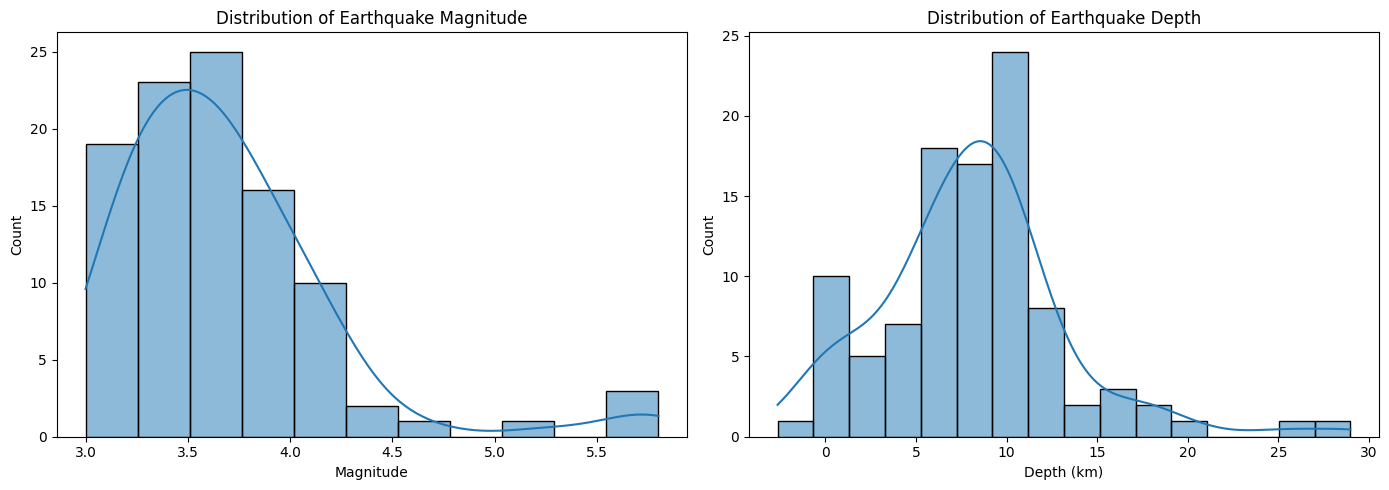

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['magnitude'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Earthquake Magnitude')
axes[0].set_xlabel('Magnitude')
axes[0].set_ylabel('Count')

sns.histplot(df['depth'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Earthquake Depth')
axes[1].set_xlabel('Depth (km)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

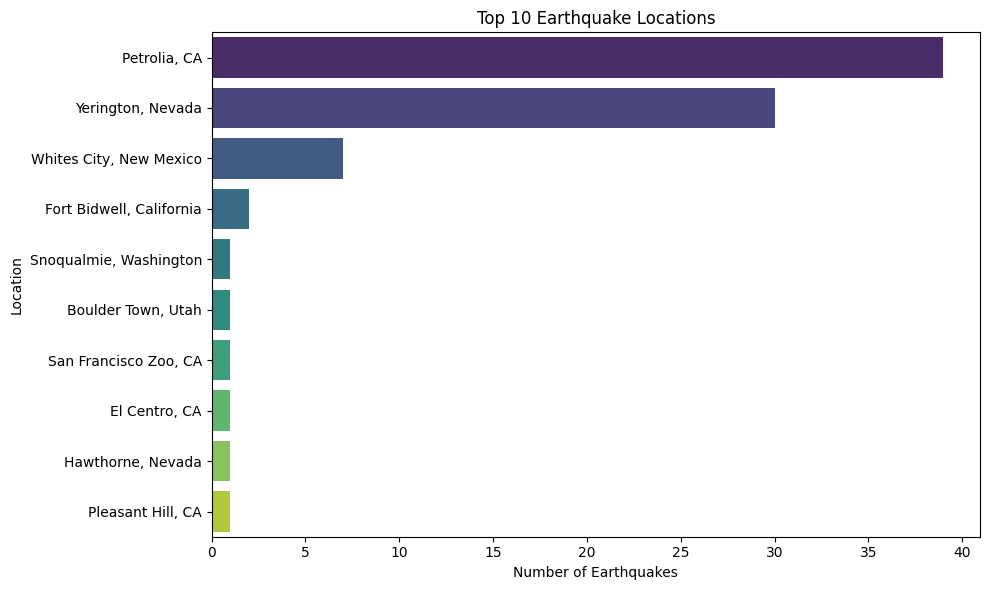

In [15]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.index, palette='viridis', legend=False)
plt.title('Top 10 Earthquake Locations')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location')
plt.tight_layout()
plt.show()